<h1 align="center">---- Data Science ----</h1>

<b>0) Packages</b>

In [2]:
using Pkg
Pkg.add("XLSX")
Pkg.add("VegaDatasets")
Pkg.add("DataFrames")
Pkg.add("MultivariateStats")
Pkg.add("RDatasets")
Pkg.add("StatsBase")
Pkg.add("Statistics")
Pkg.add("LinearAlgebra")
Pkg.add("Plots")
Pkg.add("ScikitLearn")
Pkg.add("Makie")
Pkg.add("MLBase")
Pkg.add("UMAP")
Pkg.add("Distances")

   Resolving package versions...
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Project.toml`
  No Changes to 

In [20]:
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using PyCall
using ScikitLearn
using Makie
using MLBase
using UMAP
using Distances

[ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
ERROR: LoadError: PyCall not properly installed. Please run Pkg.build("PyCall")
Stacktrace:
 [1] error(s::String)
   @ Base .\error.jl:35
 [2] top-level scope
   @ C:\Users\gabri\.julia\packages\PyCall\twYvK\src\startup.jl:44
 [3] include(mod::Module, _path::String)
   @ Base .\Base.jl:419
 [4] include(x::String)
   @ PyCall C:\Users\gabri\.julia\packages\PyCall\twYvK\src\PyCall.jl:1
 [5] top-level scope
   @ C:\Users\gabri\.julia\packages\PyCall\twYvK\src\PyCall.jl:38
 [6] include
   @ .\Base.jl:419 [inlined]
 [7] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt64}}, source::Nothing)
   @ Base .\loading.jl:1554
 [8] top-level scope
   @ stdin:1
in expression starting at C:\Users\gabri\.julia\packages\PyCall\twYvK\src\startup.jl:41
in expression starting at C:\Users\gabri\.julia\pack

LoadError: Failed to precompile PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0] to C:\Users\gabri\.julia\compiled\v1.8\PyCall\jl_873E.tmp.

----

<b>1 - Dataset</b>

In [29]:
df = DataFrame(VegaDatasets.dataset("cars"))

println("Shape: $(size(df))")
println("Features $(names(df))")
println("-*-*-*-*-")

df

Shape: (406, 9)
Features ["Name", "Miles_per_Gallon", "Cylinders", "Displacement", "Horsepower", "Weight_in_lbs", "Acceleration", "Year", "Origin"]
-*-*-*-*-


Row,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
,String,Float64?,Int64,Float64,Int64?,Int64,Float64,String,String
1,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,1970-01-01,USA
2,buick skylark 320,15.0,8,350.0,165,3693,11.5,1970-01-01,USA
3,plymouth satellite,18.0,8,318.0,150,3436,11.0,1970-01-01,USA
4,amc rebel sst,16.0,8,304.0,150,3433,12.0,1970-01-01,USA
5,ford torino,17.0,8,302.0,140,3449,10.5,1970-01-01,USA
6,ford galaxie 500,15.0,8,429.0,198,4341,10.0,1970-01-01,USA
7,chevrolet impala,14.0,8,454.0,220,4354,9.0,1970-01-01,USA
8,plymouth fury iii,14.0,8,440.0,215,4312,8.5,1970-01-01,USA
9,pontiac catalina,14.0,8,455.0,225,4425,10.0,1970-01-01,USA


In [30]:
# Describe
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,Name,,amc ambassador brougham,,vw rabbit custom,0,String
2,Miles_per_Gallon,23.5146,9.0,23.0,46.6,8,"Union{Missing, Float64}"
3,Cylinders,5.47537,3,4.0,8,0,Int64
4,Displacement,194.78,68.0,151.0,455.0,0,Float64
5,Horsepower,105.082,46,95.0,230,6,"Union{Missing, Int64}"
6,Weight_in_lbs,2979.41,1613,2822.5,5140,0,Int64
7,Acceleration,15.5197,8.0,15.5,24.8,0,Float64
8,Year,,1970-01-01,,1982-01-01,0,String
9,Origin,,Europe,,USA,0,String


In [32]:
# Drop Missing Values and Preparing Datas
dropmissing!(df)

df_matrix = Matrix(df[:, 2:7]) # matrix to apply PCA
car_origin = df[:, :Origin]    # car origin feature

names(df)

9-element Vector{String}:
 "Name"
 "Miles_per_Gallon"
 "Cylinders"
 "Displacement"
 "Horsepower"
 "Weight_in_lbs"
 "Acceleration"
 "Year"
 "Origin"

----

<b>2) PCA</b>

In [34]:
# centering and normalizing the data
data = (df_matrix .- mean(df_matrix, dims=1)) ./ std(df_matrix, dims=1)

392×6 Matrix{Float64}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
 -1.08212    1.48205    1.80219    1.70248    0.689209   -2.00855
 -1.21024    1.48205    1.39127    1.44268    0.743365   -2.73349
 -1.08212    1.48205    1.96464    1.18288    0.922314   -2.18979
  ⋮                                                       ⋮
  0.199113   0.309571  -0.128168   0.143685  -0.0383613   0

In [37]:
# as far as PCA expects each column to be an observation,
# we have to transpose the matrix
transposed_data = data'

6×392 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.697747  -1.08212   -0.697747  …   1.09597    0.583482   0.967851
  1.48205    1.48205    1.48205      -0.862911  -0.862911  -0.862911
  1.07591    1.48683    1.18103      -0.567753  -0.711097  -0.720653
  0.663285   1.57258    1.18288      -0.531795  -0.661694  -0.583754
  0.619748   0.842258   0.539692     -0.803605  -0.415097  -0.303253
 -1.28362   -1.46485   -1.64609   …  -1.4286     1.10867    1.39865

In [38]:
# now we fit a PCA Model. "maxoutdim" parameter is the output
# dimensions, in this case, 2 dims
pca_model = fit(PCA, transposed_data, maxoutdim=2)

PCA(indim = 6, outdim = 2, principalratio = 0.9194828785333571)

Pattern matrix (unstandardized loadings):
───────────────────────
         PC1        PC2
───────────────────────
1  -0.873037  -0.20899
2   0.942277   0.126601
3   0.97054    0.092613
4   0.94995   -0.141833
5   0.941156   0.244211
6  -0.638795   0.761967
───────────────────────

Importance of components:
─────────────────────────────────────────────
                                PC1       PC2
─────────────────────────────────────────────
SS Loadings (Eigenvalues)  4.78827   0.728631
Variance explained         0.798044  0.121439
Cumulative variance        0.798044  0.919483
Proportion explained       0.867927  0.132073
Cumulative proportion      0.867927  1.0
─────────────────────────────────────────────

In [39]:
# Getting the projection matrix and applying it to an
# observation (car)
projection_matrix = projection(pca_model)
projection_matrix' * (data[1, :] - mean(pca_model))

2-element Vector{Float64}:
 -2.3230016965226925
 -0.5713519642644691

In [40]:
# And, we can finally create a function to apply the projection
# matrix to all observations
transformed_data = MultivariateStats.transform(
    pca_model
    , transposed_data
)

2×392 Matrix{Float64}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607

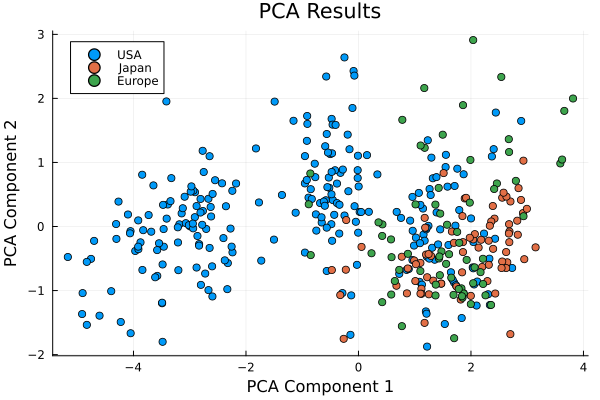

In [43]:
# Finishing, we plot the results
Plots.scatter(transformed_data[1, car_origin.=="USA"], transformed_data[2, car_origin.=="USA"], label="USA")
Plots.scatter!(transformed_data[1, car_origin.=="Japan"], transformed_data[2, car_origin.=="Japan"], label="Japan")
Plots.scatter!(transformed_data[1, car_origin.=="Europe"], transformed_data[2, car_origin.=="Europe"], label="Europe")

Plots.title!("PCA Results")
Plots.xlabel!("PCA Component 1")
Plots.ylabel!("PCA Component 2")

As far as all Japanese and European Cars are kind of nearby, we can assume that thei have similar especifications and characteristcs!!